<a href="https://www.kaggle.com/code/karapetmelkonyan/arm-car-values-prediction?scriptVersionId=187641770" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Importing libraries. 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/armenian-market-cars-prediction/Armenian Market Car Prices.csv


In [2]:
#reading CSV file
df = pd.read_csv('/kaggle/input/armenian-market-cars-prediction/Armenian Market Car Prices.csv')
print(df)

                   Car Name  Year     Region  FuelType  Mileage  Price
0              Ford Transit  2002      Goris    Diesel   215000  12000
1                Ford Focus  2017     Ijevan  Gasoline    72000  11500
2               Opel Vectra  1998    Armavir  Gasoline   466000   4000
3                   Mazda 6  2020   Nor Nork  Gasoline   100000  22000
4               Opel Vectra  1998    Armavir  Gasoline   318000   3500
...                     ...   ...        ...       ...      ...    ...
7990  VAZ (Lada) 2121 (4x4)  2013    Armavir  Gasoline   150000  35000
7991         Toyota 4Runner  2018   Nor Nork  Gasoline    94000   5600
7992   Opel Astra hatchback  2001   Ajapnyak  Gasoline   151000   9800
7993           Toyota Camry  2009  Shengavit  Gasoline   300000   4500
7994  Mercedes-Benz C-Class  1997  Nor Geghi  Gasoline   200000   3200

[7995 rows x 6 columns]


In [3]:
#Checking for NA values
df.isna().sum()

Car Name    0
Year        0
Region      0
FuelType    0
Mileage     0
Price       0
dtype: int64

In [4]:
#Checking for null values
df.isnull().sum()

Car Name    0
Year        0
Region      0
FuelType    0
Mileage     0
Price       0
dtype: int64

In [5]:
#Cheking data types
df.dtypes


Car Name    object
Year         int64
Region      object
FuelType    object
Mileage      int64
Price        int64
dtype: object

In [6]:
#Checking basic statistics for data exploration.
df.describe()

,Year,Mileage,Price
count,7995.000000,7995.000000,7995.000000
mean,2010.342089,146401.523327,15555.002877
std,9.113848,108371.306576,17731.598604
min,1943.000000,10.000000,200.000000
25%,2004.000000,60000.000000,6000.000000
50%,2011.000000,130000.000000,11500.000000
75%,2018.000000,210000.000000,19000.000000
max,2024.000000,1000000.000000,565000.000000


In [7]:
# Feature engineering 

# Calculate the current year
current_year = pd.Timestamp.now().year

# Calculate the car age
df['Car Age'] = current_year - df['Year']
# Create age bins
age_bins = [0, 3, 6, 9, 12, 15, np.inf]
age_labels = ['0-2', '3-5', '6-8', '9-11', '12-14', '15+']



df


,Car Name,Year,Region,FuelType,Mileage,Price,Car Age
0,Ford Transit,2002,Goris,Diesel,215000,12000,22
1,Ford Focus,2017,Ijevan,Gasoline,72000,11500,7
2,Opel Vectra,1998,Armavir,Gasoline,466000,4000,26
3,Mazda 6,2020,Nor Nork,Gasoline,100000,22000,4
4,Opel Vectra,1998,Armavir,Gasoline,318000,3500,26
...,...,...,...,...,...,...,...
7990,VAZ (Lada) 2121 (4x4),2013,Armavir,Gasoline,150000,35000,11
7991,Toyota 4Runner,2018,Nor Nork,Gasoline,94000,5600,6
7992,Opel Astra hatchback,2001,Ajapnyak,Gasoline,151000,9800,23
7993,Toyota Camry,2009,Shengavit,Gasoline,300000,4500,15


In [8]:
# Data cleaning, excluding from data Prices outliers.

from scipy.stats import zscore

# Categorize cars into age bins
df['Age Bin'] = pd.cut(df['Car Age'], bins=age_bins, labels=age_labels, right=False)

# Group by 'Car Name' and 'Age Bin' to calculate mean and std for 'Price'
grouped = df.groupby(['Car Name', 'Age Bin'], observed=False)

# Calculate the Z-score for each price within each group
df['Price Z-Score'] = grouped['Price'].transform(lambda x: zscore(x, ddof=0))

# Define a threshold for the Z-score (e.g., more or less is subject to manual explooration)
zscore_threshold = 0.7

# Filter out rows with Z-score outside the threshold
filtered_df = df[(df['Price Z-Score'] >= -zscore_threshold) & 
                 (df['Price Z-Score'] <= zscore_threshold)]

# Drop the temporary column used for filtering
filtered_df = filtered_df.drop(columns=['Price Z-Score'])

# Display the filtered DataFrame
print(filtered_df)

df = filtered_df

                   Car Name  Year      Region  FuelType  Mileage  Price  \
0              Ford Transit  2002       Goris    Diesel   215000  12000   
1                Ford Focus  2017      Ijevan  Gasoline    72000  11500   
2               Opel Vectra  1998     Armavir  Gasoline   466000   4000   
3                   Mazda 6  2020    Nor Nork  Gasoline   100000  22000   
5                   Mazda 6  2018    Nor Nork  Gasoline   127000  17800   
...                     ...   ...         ...       ...      ...    ...   
7985  Mercedes-Benz C-Class  2000    Alaverdi  Gasoline   210000   4350   
7988     Mitsubishi Chariot  1999  Nubarashen  Gasoline   567891   7900   
7989  VAZ (Lada) 2121 (4x4)  2013     Armavir  Gasoline   150000   7900   
7991         Toyota 4Runner  2018    Nor Nork  Gasoline    94000   5600   
7992   Opel Astra hatchback  2001    Ajapnyak  Gasoline   151000   9800   

      Car Age Age Bin  
0          22     15+  
1           7     6-8  
2          26     15+  
3  

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


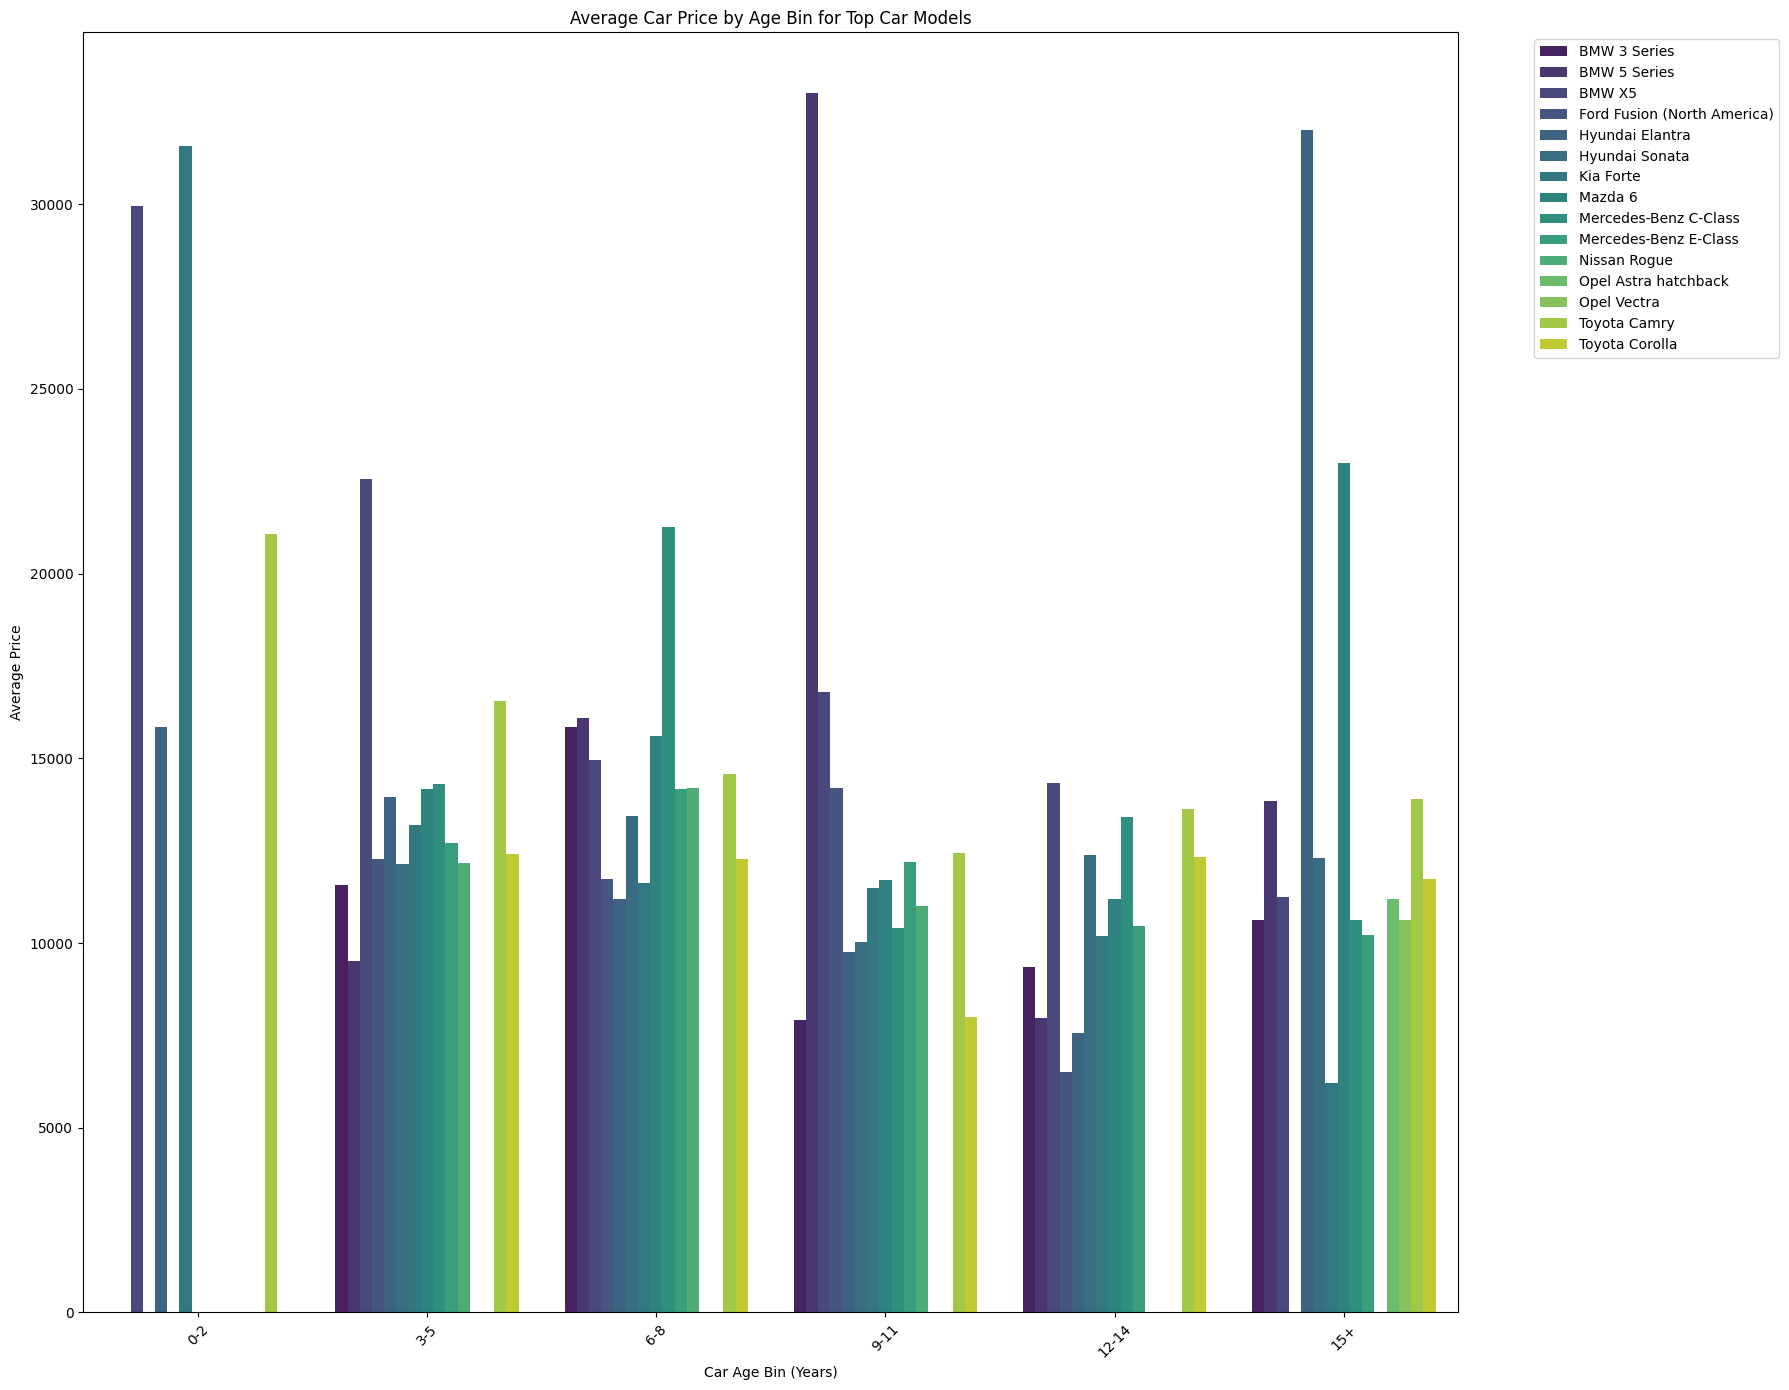

                   Car Name  Year        Region  FuelType  Mileage  Price  \
2               Opel Vectra  1998       Armavir  Gasoline   466000   4000   
3                   Mazda 6  2020      Nor Nork  Gasoline   100000  22000   
5                   Mazda 6  2018      Nor Nork  Gasoline   127000  17800   
7     Mercedes-Benz E-Class  2001          Vedi  Gasoline   219779   7200   
9              BMW 5 Series  2006     Chambarak  Gasoline   222700   8400   
...                     ...   ...           ...       ...      ...    ...   
7967           Toyota Camry  2016    Echmiadzin  Gasoline   160000  10500   
7970        Hyundai Elantra  2017  Charentsavan  Gasoline   150000   5700   
7973           Nissan Rogue  2018     Shengavit  Gasoline    77000  26500   
7985  Mercedes-Benz C-Class  2000      Alaverdi  Gasoline   210000   4350   
7992   Opel Astra hatchback  2001      Ajapnyak  Gasoline   151000   9800   

      Car Age Age Bin  
2          26     15+  
3           4     3-5  
5  

In [9]:

# Focus on top car models by count
top_car_counts = df['Car Name'].value_counts().head(15).index
df_top_cars = df[df['Car Name'].isin(top_car_counts)]

# Calculate average price for each car model within each age bin for top cars
average_price_by_top_cars = df_top_cars.groupby(['Car Name', 'Age Bin'], observed=False)['Price'].mean().reset_index()



# Plotting with seaborn
plt.figure(figsize=(18, 14))
sns.barplot(x='Age Bin', y='Price', hue='Car Name', data=average_price_by_top_cars, palette='viridis')
plt.title('Average Car Price by Age Bin for Top Car Models')
plt.xlabel('Car Age Bin (Years)')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print(df_top_cars)

In [10]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid SettingWithCopyWarning
df_top_cars_copy = df_top_cars.copy()

# Initialize label encoders
le_car_name = LabelEncoder()
le_fuel_type = LabelEncoder()
le_region = LabelEncoder()

# Fit and transform the data using .loc
df_top_cars_copy.loc[:, 'Car Name Encoded'] = le_car_name.fit_transform(df_top_cars_copy['Car Name'])
df_top_cars_copy.loc[:, 'FuelType Encoded'] = le_fuel_type.fit_transform(df_top_cars_copy['FuelType'])
df_top_cars_copy.loc[:, 'Region Encoded'] = le_region.fit_transform(df_top_cars_copy['Region'])

# Assign the transformed DataFrame to df
df = df_top_cars_copy



***Machine Learning** *

Training Linear Regression Model

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Feature selection
X = df[['Mileage', 'Car Age', 'Car Name Encoded', 'FuelType Encoded',"Region Encoded"]]
y = df['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

# Example prediction
example_car = pd.DataFrame([{
    'Mileage': 30000,
    'Car Age': 4,
    'Car Name Encoded': 9,  
    'FuelType Encoded': 1,    
    'Region Encoded' : 7   
}])

print("\nExample Car:")
print(example_car)

# Make sure the example car's DataFrame has the same structure as X used in the model
prediction = model.predict(example_car)
print(f'Predicted Price: {prediction[0]}')

Mean Absolute Error: 4868.274214821694

Example Car:
   Mileage  Car Age  Car Name Encoded  FuelType Encoded  Region Encoded
0    30000        4                 9                 1               7
Predicted Price: 14875.041957145875
